### MinCopter Plotting

Need to be able to plot the following

#### Sensor
For simulation, all @ 100Hz
- **Accelerometer** (3x float) body frame (in MinCopter, NED), in m/s2, after processing by MinCopter (AP_InertialSensor)
- **Gyrometer** (3x float) body frame (in MinCopter, NED), in rad/s, after processing by MinCopter (AP_InertialSensor)
- **Compass** (3x float) body frame (in MinCopter, NED), in $\micro T$, after processing by MinCopter (AP_Compass)
- **GPS** TODO Later
- **Barometer** TODO Later

#### State
Both estimated (from things like the EKF, and the complementary filter) and actual (from Gazebo)
- **Position (estimated)** (3x float) world frame (in MinCopter, NED), in metres
- **Position (actual)** (3x float) world frame (in MinCopter, NED), in metres
- **Velocity (estimated)** (3x float) world frame (in MinCopter, NED), in m/s
- **Velocity (actual)** (3x float) world frame (in MinCopter, NED), in m/s
- **Orientation (estimated)** (3x float) in Y-P-R intrinsic Euler Angles, each in radians
- **Orientation (actual)** (3x float) in Y-P-R intrinsic Euler Angles, each in radians
- **Angular Velocity (estimated)** *TODO what frame?*
- **Angular Velocity (actual)** *TODO what frame?*

#### Control
- **Force** (1x float) force applied in N
- **Torques** (3x float) angular forces required in Nm
- **Motor Velocities** (4x float) Output of mixer for each motor in rad/s

## `TODO`
- Change from range(0,len(... to actually having the simulation iteration or timestep
- Add ability to plot or retrieve certain ranges or subsets of the simulation (like from iteration 10-20)
  

In [1]:
from matplotlib import pyplot as plt
import struct
import math

## Configs
#max_iter = 125
max_iter = None

In [2]:
def parse(frame, ctx):
    #print(f"pkt found {len(frame)} {frame[2]}")
    if frame[2]==0x01:
        roll, pitch, yaw = struct.unpack('<fff', frame[4:])
        ctx['roll'].append(roll)
        ctx['pitch'].append(pitch)
        ctx['yaw'].append(yaw)

    elif frame[2]==0x02:
        pos_x, pos_y, pos_z = struct.unpack('<fff', frame[4:])
        ctx['pos_x'].append(pos_x)
        ctx['pos_y'].append(pos_y)
        ctx['pos_z'].append(pos_z)

    elif frame[2]==0x03:
        vel_x, vel_y, vel_z = struct.unpack('<fff', frame[4:])
        ctx['vel_x'].append(vel_x)
        ctx['vel_y'].append(vel_y)
        ctx['vel_z'].append(vel_z)

    elif frame[2]==0x04:
        er_x, er_y, er_z = struct.unpack('<fff', frame[4:])
        ctx['er_x'].append(er_x)
        ctx['er_y'].append(er_y)
        ctx['er_z'].append(er_z)

    elif frame[2]==0x05:
        force, rt, pt, yt = struct.unpack('<ffff', frame[4:])
        ctx['force'].append(force)
        ctx['rt'].append(rt)
        ctx['pt'].append(pt)
        ctx['yt'].append(yt)

    elif frame[2]==0x06:
        m0, m1, m2, m3 = struct.unpack('<hhhh', frame[4:])
        ctx['m0'].append(m0)
        ctx['m1'].append(m1)
        ctx['m2'].append(m2)
        ctx['m3'].append(m3)

    elif frame[2]==0x07:
        accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, comp_x, comp_y, comp_z = struct.unpack('<fffffffff', frame[4:])
        ctx['accel_x'].append(accel_x)
        ctx['accel_y'].append(accel_y)
        ctx['accel_z'].append(accel_z)
        ctx['gyro_x'].append(gyro_x)
        ctx['gyro_y'].append(gyro_y)
        ctx['gyro_z'].append(gyro_z)
        ctx['comp_x'].append(comp_x)
        ctx['comp_y'].append(comp_y)
        ctx['comp_z'].append(comp_z)

    elif frame[2]==0x08:
        pos_x_a, pos_y_a, pos_z_a, vel_x_a, vel_y_a, vel_z_a, eul_x_a, eul_y_a, eul_z_a, er_x_a, er_y_a, er_z_a = struct.unpack('<ffffffffffff',frame[4:])
        ctx['pos_x_a'].append(pos_x_a)
        ctx['pos_y_a'].append(pos_y_a)
        ctx['pos_z_a'].append(pos_z_a)
        ctx['vel_x_a'].append(vel_x_a)
        ctx['vel_y_a'].append(vel_y_a)
        ctx['vel_z_a'].append(vel_z_a)
        ctx['eul_x_a'].append(eul_x_a)
        ctx['eul_y_a'].append(eul_y_a)
        ctx['eul_z_a'].append(eul_z_a)        
        ctx['er_x_a'].append(er_x_a)        
        ctx['er_y_a'].append(er_y_a)        
        ctx['er_z_a'].append(er_z_a)        
        

In [3]:
with open('../build-generic/mincopter_log.txt','rb') as rfile:
    x = rfile.read()

ctx = {
    'roll': [],
    'pitch': [],
    'yaw': [],
    'er_x': [],
    'er_y': [],
    'er_z': [],
    'pos_x': [],
    'pos_y': [],
    'pos_z': [],
    'vel_x': [],
    'vel_y': [],
    'vel_z': [],
    'force': [],
    'rt': [],
    'pt': [],
    'yt': [],
    'm0': [],
    'm1': [],
    'm2': [],
    'm3': [],
    'accel_x': [],
    'accel_y': [],
    'accel_z': [],
    'gyro_x': [],
    'gyro_y': [],
    'gyro_z': [],
    'comp_x': [],
    'comp_y': [],
    'comp_z': [],
    'pos_x_a': [],
    'pos_y_a': [],
    'pos_z_a': [],
    'vel_x_a': [],
    'vel_y_a': [],
    'vel_z_a': [],
    'eul_x_a': [],
    'eul_y_a': [],
    'eul_z_a': [],
    'er_x_a': [],
    'er_y_a': [],
    'er_z_a': []
}
    
idx = 0
while(idx<len(x)):
    frame_type = x[idx+2]
    frame_len = x[idx+3]
    frame = x[idx:idx+frame_len+4]
    parse(frame, ctx)
    idx += len(frame)

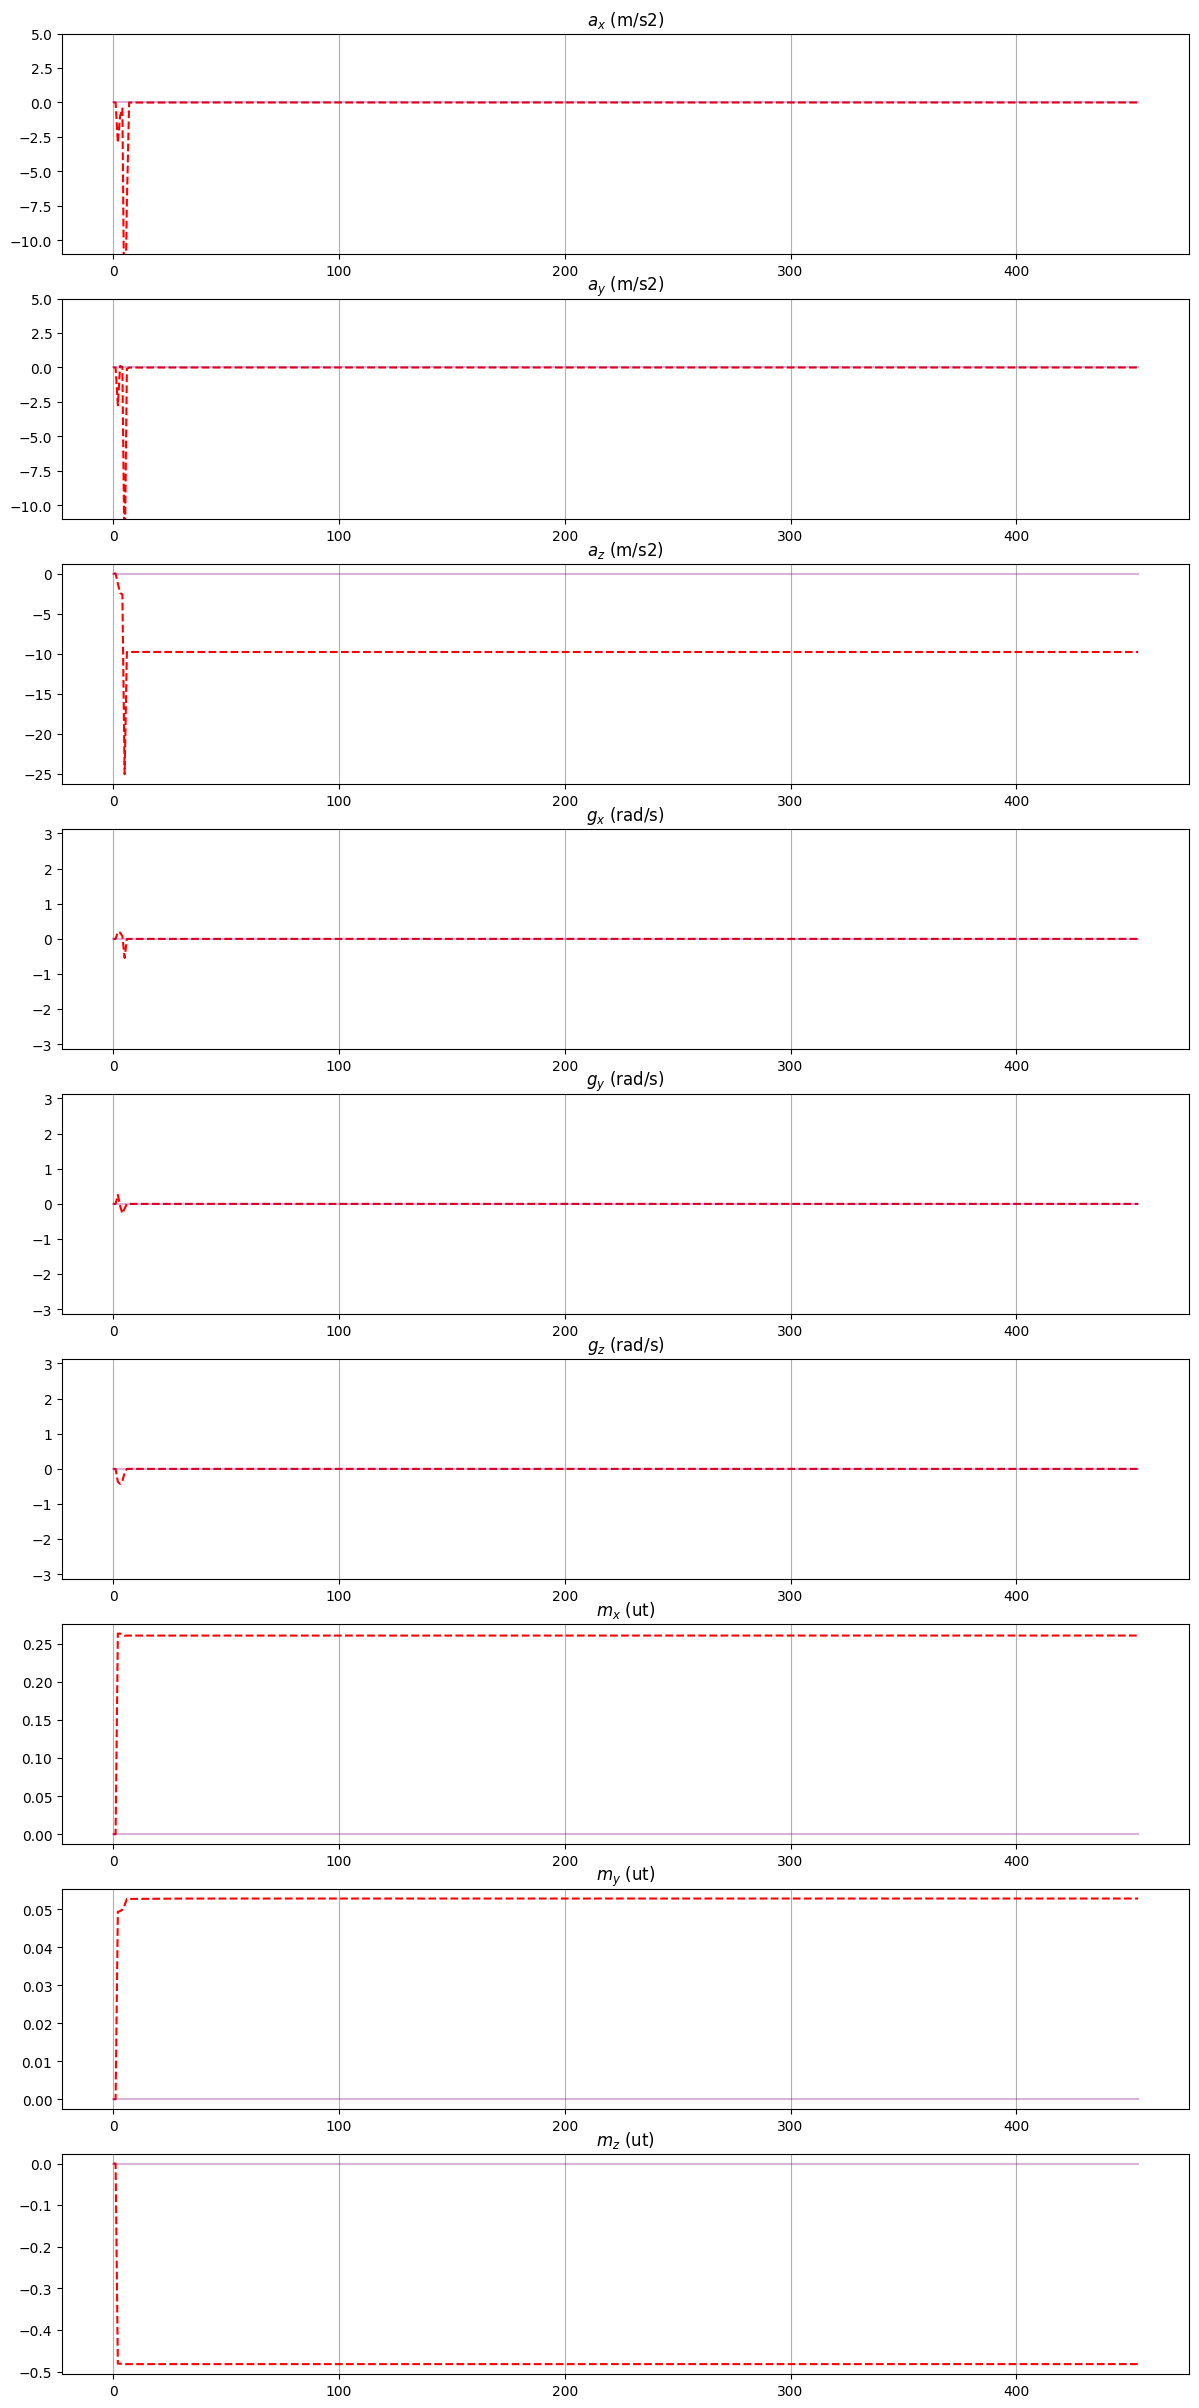

In [4]:
## Sensor Plots
sensor_fig, sensor_ax = plt.subplots(9,1, figsize=(12,24))
sensor_fig.tight_layout()

sensor_locs = {'accel_x': (0,0, r"$a_{x}$ (m/s2)"),
                   'accel_y': (1,0, r"$a_{y}$ (m/s2)"),
                   'accel_z': (2,0, r"$a_{z}$ (m/s2)"),
                   'gyro_x': (3,0, r"$g_{x}$ (rad/s)"),
                   'gyro_y': (4,0, r"$g_{y}$ (rad/s)"),
                   'gyro_z': (5,0, r"$g_{z}$ (rad/s)"),
                   'comp_x': (6,0, r"$m_{x}$ (ut)"),
                   'comp_y': (7,0, r"$m_{y}$ (ut)"),
                   'comp_z': (8,0, r"$m_{z}$ (ut)")
              }

for e in sensor_locs.keys():
    dlen = max_iter if max_iter is not None else len(ctx[e])
    
    sensor_ax[sensor_locs[e][0]].set_title(sensor_locs[e][2])
    sensor_ax[sensor_locs[e][0]].plot(range(0,dlen), ctx[e][:dlen], linestyle='--', color='red')
    sensor_ax[sensor_locs[e][0]].grid(axis='x')
    sensor_ax[sensor_locs[e][0]].plot(range(0,dlen), dlen*[0], linestyle='-', color='purple', alpha=0.3)
    
    if e in ['gyro_x', 'gyro_y', 'gyro_z']:
        sensor_ax[sensor_locs[e][0]].set_ylim(-math.pi, math.pi)

    if e in ['accel_x', 'accel_y']:
        sensor_ax[sensor_locs[e][0]].set_ylim(-11, 5)

plt.show()

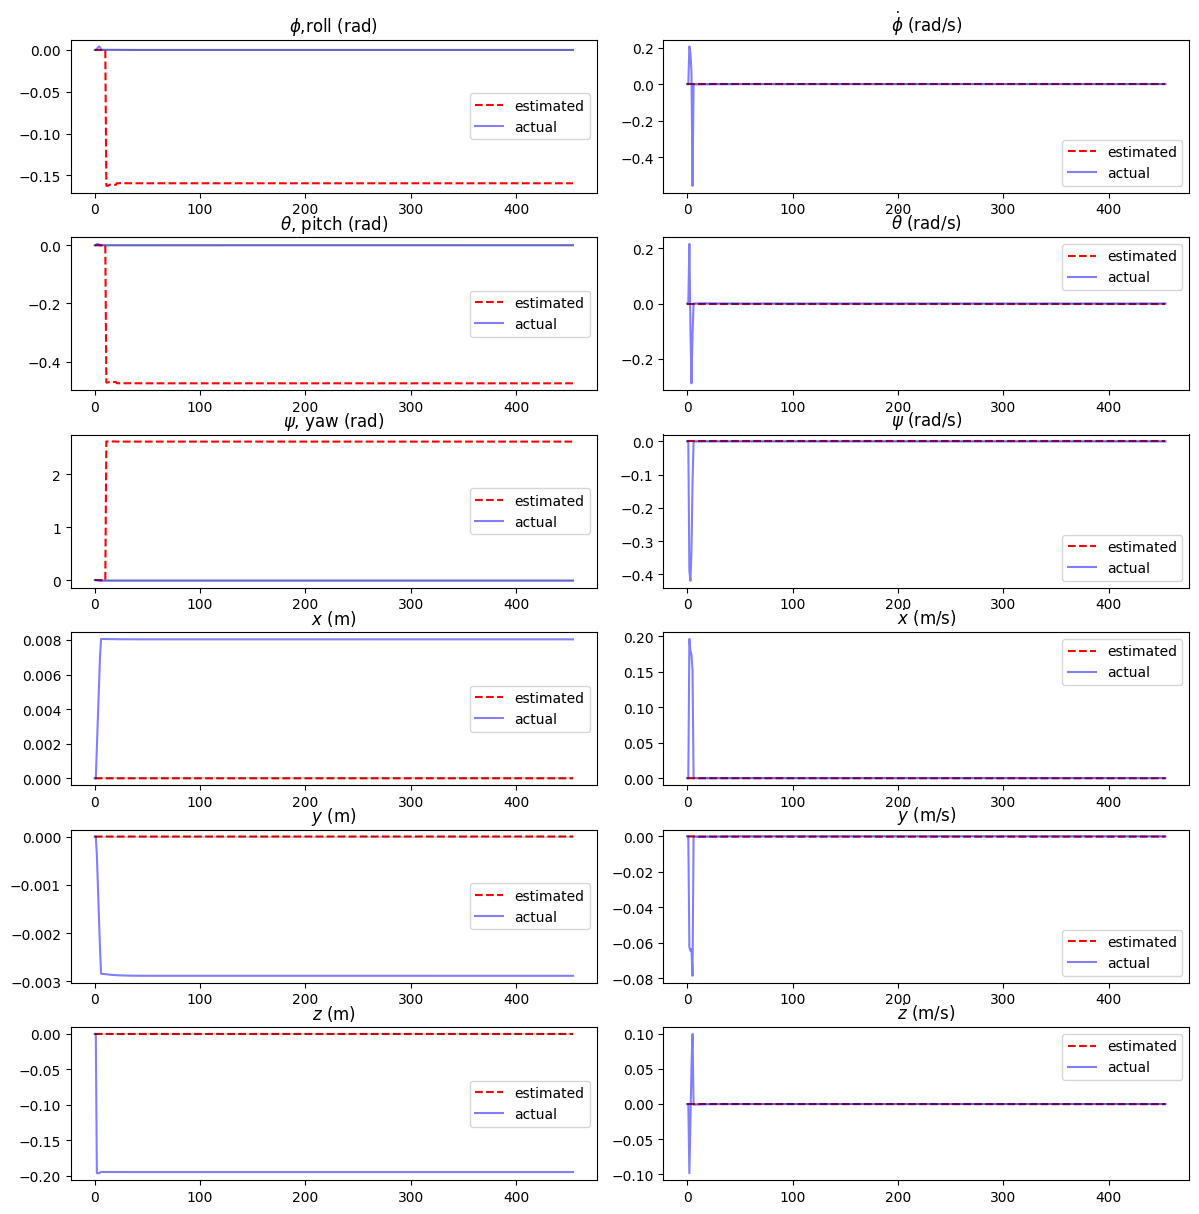

In [5]:
## State Plots
state_fig, state_ax = plt.subplots(6,2, figsize=(12,12))
state_fig.tight_layout()

state_locs = {'roll':  (0,0,r"$\phi$,roll (rad)", 'eul_x_a'),
              'pitch': (1,0,r"$\theta$, pitch (rad)", 'eul_y_a'),
              'yaw':   (2,0,r"$\psi$, yaw (rad)", 'eul_z_a'),
              'er_x':  (0,1,r"$\dot{\phi}$ (rad/s)", 'er_x_a'),
              'er_y':  (1,1,r"$\dot{\theta}$ (rad/s)", 'er_y_a'),
              'er_z':  (2,1,r"$\dot{\psi}$ (rad/s)", 'er_z_a'),
              'pos_x': (3,0,r"$x$ (m)", 'pos_x_a'),
              'pos_y': (4,0,r"$y$ (m)", 'pos_y_a'),
              'pos_z': (5,0,r"$z$ (m)", 'pos_z_a'),
              'vel_x': (3,1,r"$\dot{x}$ (m/s)", 'vel_x_a'),
              'vel_y': (4,1,r"$\dot{y}$ (m/s)", 'vel_y_a'),
              'vel_z': (5,1,r"$\dot{z}$ (m/s)", 'vel_z_a')
             }

for e in state_locs.keys():
    dlen = max_iter if max_iter is not None else len(ctx[e])

    state_ax[state_locs[e][0], state_locs[e][1]].set_title(state_locs[e][2])
    state_ax[state_locs[e][0], state_locs[e][1]].plot(range(0,dlen), ctx[e][:dlen], linestyle='--', color='red', label='estimated')
    if state_locs[e][3] is not None:
        state_ax[state_locs[e][0], state_locs[e][1]].plot(range(0,dlen), ctx[state_locs[e][3]][:dlen], linestyle='-', color='blue', alpha=0.5, label='actual')
        
    if e in ['roll','pitch','yaw']:
        ## TODO Set limits and add lines at each 90deg interval
        pass
    state_ax[state_locs[e][0], state_locs[e][1]].plot(range(0,dlen), dlen*[0], color='black', alpha=0.2)
    state_ax[state_locs[e][0], state_locs[e][1]].legend()

plt.show()

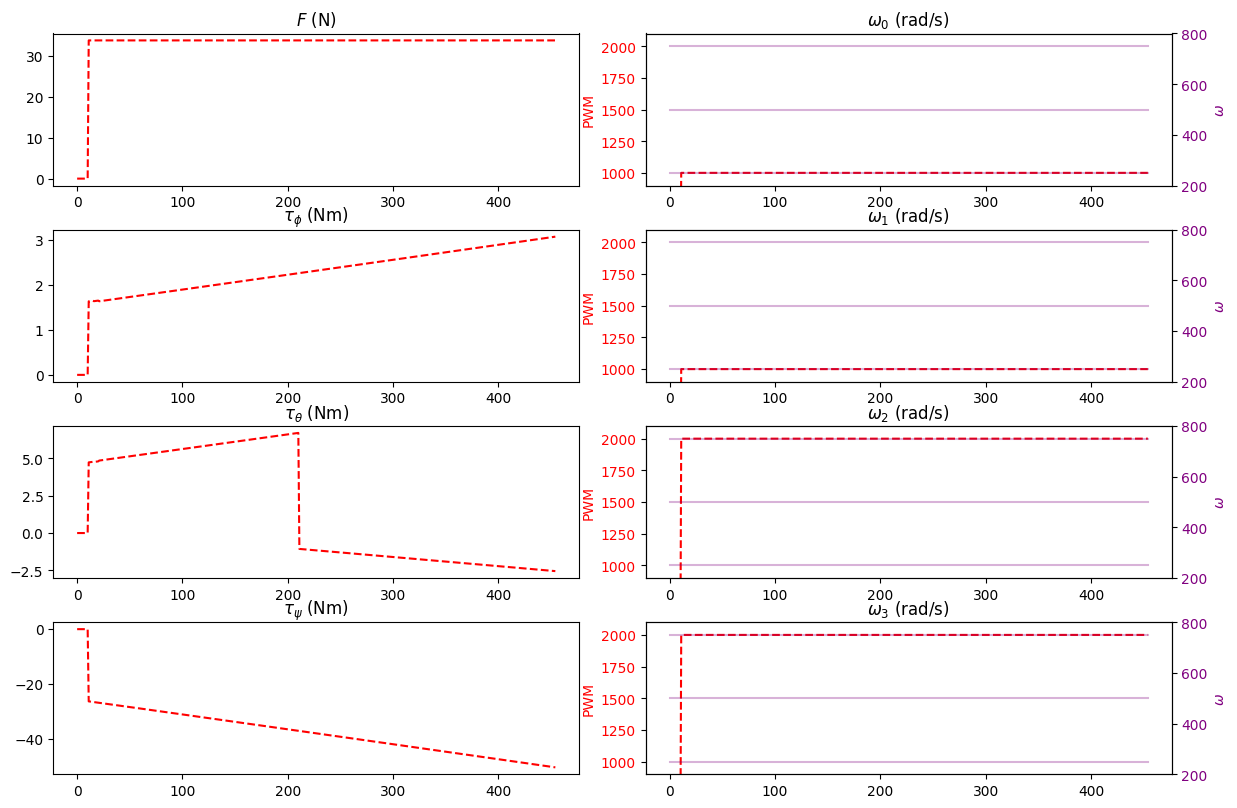

In [6]:
## Control Plots
control_fig, control_ax = plt.subplots(4,2, figsize=(12,8))
control_fig.tight_layout()

control_locs = {
              'force': (0,0,r"$F$ (N)"), 
              'rt': (1,0,r"$\tau_{\phi}$ (Nm)"),
              'pt': (2,0,r"$\tau_{\theta}$ (Nm)"),
              'yt': (3,0,r"$\tau_{\psi}$ (Nm)"),
              'm0': (0,1,r"$\omega_{0}$ (rad/s)"),
              'm1': (1,1,r"$\omega_{1}$ (rad/s)"),
              'm2': (2,1,r"$\omega_{2}$ (rad/s)"),
              'm3': (3,1,r"$\omega_{3}$ (rad/s)")}

for e in control_locs.keys():
    dlen = max_iter if max_iter is not None else len(ctx[e])

    control_ax[control_locs[e][0], control_locs[e][1]].set_title(control_locs[e][2])    
    control_ax[control_locs[e][0], control_locs[e][1]].plot(range(0,dlen), ctx[e][:dlen], linestyle='--', color='red')

    if e in ['m0','m1','m2','m3']:
        control_ax[control_locs[e][0], control_locs[e][1]].set_ylim(900,2100)
        control_ax[control_locs[e][0], control_locs[e][1]].tick_params(axis='y', labelcolor='red')
        control_ax[control_locs[e][0], control_locs[e][1]].set_ylabel("PWM", color='red')

        cax_2 = control_ax[control_locs[e][0], control_locs[e][1]].twinx()
        cax_2.set_ylim(200,800)
        cax_2.set_ylabel(r"$\omega$", color='purple')
        cax_2.tick_params(axis='y', labelcolor='purple')

        for row in [250, 500, 750]:
            cax_2.plot(range(0, dlen), dlen*[row], color='purple', alpha=0.3)
        
plt.show()